In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from mlxtend.plotting import plot_decision_regions
from sklearn.neural_network import MLPClassifier

In [2]:
dataset = pd.read_csv('./datasets/LoanStats_securev1_2020Q3.csv.zip', compression='zip')
dataset.head(3)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,19,24,25,27,28,29,30,31,32,33,34,36,38,39,40,41,42,43,44,45,46,48,51,52,53,54,55,57,58,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,119,120,121,122,123,124,125,126,127,132,133,137,138,139,140,141,142,144,145,146,147,148,149) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
170954212,NaN,15000,15000,15000,36 months,17.30%,537.04,C,C1,Clinic Manager,1 year,MORTGAGE,135000,Source Verified,Sep-2020,Issued,n,https://lendingclub.com/browse/loanDetail.action?loan_id=170954212,NaN,credit_card,Credit card refinancing,930xx,CA,19.32,0,Aug-1997,700,704,1,33,NaN,12,0,13573,52.2%,19,w,15000.00,15000.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.0,Oct-2020,Oct-2020,699,695,0,NaN,1,Individual,NaN,NaN,NaN,0,0,672949,4,3,1,2,3,64200,89,2,2,3654,75,26000,1,1,5,5,56079,7146,33.8,0,0,277,184,2,2,1,2,NaN,0,33,0,1,5,4,4,9,8,9,5,12,0,0,0,4,94.7,25,0,0,707681,77773,10800,84642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
170933893,NaN,20000,20000,20000,60 months,16.08%,487.22,B,B5,Project Coordinator,10+ years,MORTGAGE,90000,Source Verified,Sep-2020,Issued,n,https://lendingclub.com/browse/loanDetail.action?loan_id=170933893,NaN,major_purchase,Major purchase,927xx,CA,15.29,0,Aug-2007,710,714,0,NaN,108,12,1,18976,25.6%,15,w,20000.00,20000.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.0,Oct-2020,Oct-2020,714,710,0,NaN,1,Individual,NaN,NaN,NaN,0,0,28107,0,1,0,2,14,9131,61,0,1,3494,32,74200,1,0,2,3,2342,46128,18.6,0,0,25,61,19,14,1,19,NaN,7,NaN,0,6,7,9,9,3,11,11,7,12,0,0,0,0,100,0,1,0,89200,28107,56700,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,

In [3]:
print(dataset.info(verbose=True, null_counts=True))
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 28402 entries, ('id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_jo

,Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
count,1
unique,1
top,settlement_term
freq,1


In [4]:
print(dataset.info)

<bound method DataFrame.info of                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [5]:
dataset.reset_index(inplace=True) #, col_level=3)  

In [6]:
dataset.head(5)

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,level_12,level_13,level_14,level_15,level_16,level_17,level_18,level_19,level_20,level_21,level_22,level_23,level_24,level_25,level_26,level_27,level_28,level_29,level_30,level_31,level_32,level_33,level_34,level_35,level_36,level_37,level_38,level_39,...,level_110,level_111,level_112,level_113,level_114,level_115,level_116,level_117,level_118,level_119,level_120,level_121,level_122,level_123,level_124,level_125,level_126,level_127,level_128,level_129,level_130,level_131,level_132,level_133,level_134,level_135,level_136,level_137,level_138,level_139,level_140,level_141,level_142,level_143,level_144,level_145,level_146,level_147,level_148,Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1,170954212,NaN,15000,15000,15000,36 months,17.30%,537.04,C,C1,Clinic Manager,1 year,MORTGAGE,135000,Source Verified,Sep-2020,Issued,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,930xx,CA,19.32,0,Aug-1997,700,704,1,33,NaN,12,0,13573,52.2%,19,w,15000.00,15000.00,...,0,707681,77773,10800,84642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,170933893,NaN,20000,20000,20000,60 months,16.08%,487.22,B,B5,Project Coordinator,10+ years,MORTGAGE,90000,Source Verified,Sep-2020,Issued,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,927xx,CA,15.29,0,Aug-2007,710,714,0,NaN,108,12,1,18976,25.6%,15,w,20000.00,20000.00,...,0,89200,28107,56700,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,170727012,NaN,30000,30000,29250,36 months,9.56%,961.84,A,A3,Business Manager,3 years,OWN,90000,Not Verified,Sep-2020,Issued,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,338xx,FL,37.96,0,Nov-2003,775,779,0,NaN,NaN,15,0,27072,25.3%,50,f,30000.00,29250.00,...,0,187381,67442,84500,80181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,170138660,NaN,25000,25000,25000,60 months,18.24%,638.11,C,C2,RN,3 years,MORTGAGE,90000,Not Verified,Sep-2020,Issued,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,144xx,NY,24.85,0,Oct-1992,695,699,1,44,NaN,18,0,8708,47.1%,39,f,25000.00,25000.00,...,0,201168,141490,15000,140268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,Na

In [7]:
dataset.rename(columns=dataset.iloc[0], inplace = True)
#dataset

In [8]:
dataset.drop([0])
#dataset.info

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1,170954212,NaN,15000,15000,15000,36 months,17.30%,537.04,C,C1,Clinic Manager,1 year,MORTGAGE,135000,Source Verified,Sep-2020,Issued,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,930xx,CA,19.32,0,Aug-1997,700,704,1,33,NaN,12,0,13573,52.2%,19,w,15000.00,15000.00,...,0,707681,77773,10800,84642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,170933893,NaN,20000,20000,20000,60 months,16.08%,487.22,B,B5,Project Coordinator,10+ years,MORTGAGE,90000,Source Verified,Sep-2020,Issued,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,927xx,CA,15.29,0,Aug-2007,710,714,0,NaN,108,12,1,18976,25.6%,15,w,20000.00,20000.00,...,0,89200,28107,56700,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,170727012,NaN,30000,30000,29250,36 months,9.56%,961.84,A,A3,Business Manager,3 years,OWN,90000,Not Verified,Sep-2020,Issued,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,338xx,FL,37.96,0,Nov-2003,775,779,0,NaN,NaN,15,0,27072,25.3%,50,f,30000.00,29250.00,...,0,187381,67442,84500,80181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,170138660,NaN,25000,25000,25000,60 months,18.24%,638.11,C,C2,RN,3 years,MORTGAGE,90000,Not Verified,Sep-2020,Issued,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,144xx,NY,24.85,0,Oct-1992,695,699,1,44,NaN,18,0,8708,47.1%,39,f,25000.00,25000.00,...,0,201168,141490,15000,140268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
5,170184692,NaN,1200,1200,1200,36 months,20.74%,45.06,C,C5,meat manager,10+ years,MORTGAGE,78000,Source Verified,Sep-2020,Issued,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,Home improvement,935xx,CA,16.86,1,Sep-2011,695,699,0,8,NaN,12,0,8831,32.1%,30,w,1200.00,1200.00,...,0,273016,38089,8500,37166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28397,169157465,NaN,24000,240

In [9]:
dataset.drop(dataset.tail(2).index,inplace=True) # drop last n rows


In [10]:
dataset.shape

(28400, 150)

In [11]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1,170954212,NaN,15000,15000,15000,36 months,17.30%,537.04,C,C1,Clinic Manager,1 year,MORTGAGE,135000,Source Verified,Sep-2020,Issued,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,930xx,CA,19.32,0,Aug-1997,700,704,1,33,NaN,12,0,13573,52.2%,19,w,15000.00,15000.00,...,0,707681,77773,10800,84642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,170933893,NaN,20000,20000,20000,60 months,16.08%,487.22,B,B5,Project Coordinator,10+ years,MORTGAGE,90000,Source Verified,Sep-2020,Issued,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,927xx,CA,15.29,0,Aug-2007,710,714,0,NaN,108,12,1,18976,25.6%,15,w,20000.00,20000.00,...,0,89200,28107,56700,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,170727012,NaN,30000,30000,29250,36 months,9.56%,961.84,A,A3,Business Manager,3 years,OWN,90000,Not Verified,Sep-2020,Issued,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,338xx,FL,37.96,0,Nov-2003,775,779,0,NaN,NaN,15,0,27072,25.3%,50,f,30000.00,29250.00,...,0,187381,67442,84500,80181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,N

In [12]:
data= dataset.drop([0])
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1,170954212,NaN,15000,15000,15000,36 months,17.30%,537.04,C,C1,Clinic Manager,1 year,MORTGAGE,135000,Source Verified,Sep-2020,Issued,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,930xx,CA,19.32,0,Aug-1997,700,704,1,33,NaN,12,0,13573,52.2%,19,w,15000.00,15000.00,...,0,707681,77773,10800,84642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,170933893,NaN,20000,20000,20000,60 months,16.08%,487.22,B,B5,Project Coordinator,10+ years,MORTGAGE,90000,Source Verified,Sep-2020,Issued,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,927xx,CA,15.29,0,Aug-2007,710,714,0,NaN,108,12,1,18976,25.6%,15,w,20000.00,20000.00,...,0,89200,28107,56700,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,170727012,NaN,30000,30000,29250,36 months,9.56%,961.84,A,A3,Business Manager,3 years,OWN,90000,Not Verified,Sep-2020,Issued,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,338xx,FL,37.96,0,Nov-2003,775,779,0,NaN,NaN,15,0,27072,25.3%,50,f,30000.00,29250.00,...,0,187381,67442,84500,80181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,170138660,NaN,25000,25000,25000,60 months,18.24%,638.11,C,C2,RN,3 years,MORTGAGE,90000,Not Verified,Sep-2020,Issued,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,144xx,NY,24.85,0,Oct-1992,695,699,1,44,NaN,18,0,8708,47.1%,39,f,25000.00,25000.00,...,0,201168,141490,15000,140268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
5,170184692,NaN,1200,1200,1200,36 months,20.74%,45.06,C,C5,meat manager,10+ years,MORTGAGE,78000,Source Verified,Sep-2020,Issued,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,Home improvement,935xx,CA,16.86,1,Sep-2011,695,699,0,8,NaN,12,0,8831,32.1%,30,w,1200.00,1200.00,...,0,273016,38089,8500,37166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28395,169147100,NaN,22500,225

SELECCIONAMOS DE LAS 150 VARIABLES 12 ATRIBUTOS

In [13]:
labels_x = ['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','verification_status','purpose','dti']
labels_y = ['loan_status']

In [14]:
#data = dataset[labels_x]
#data = dataset[['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','verification_status','purpose','dti']]
data = dataset[labels_x]


In [15]:
data.info

<bound method DataFrame.info of        loan_amnt        term  ...             purpose    dti
0      loan_amnt        term  ...             purpose    dti
1          15000   36 months  ...         credit_card  19.32
2          20000   60 months  ...      major_purchase  15.29
3          30000   36 months  ...  debt_consolidation  37.96
4          25000   60 months  ...  debt_consolidation  24.85
...          ...         ...  ...                 ...    ...
28395      22500   36 months  ...  debt_consolidation  35.98
28396       6000   36 months  ...    home_improvement   38.5
28397      24000   36 months  ...         credit_card  14.31
28398      31550   36 months  ...      small_business   2.57
28399      30000   36 months  ...    home_improvement  16.51

[28400 rows x 12 columns]>

In [16]:
data['loan_status'] = dataset['loan_status']
data= data.drop([0])
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,loan_status
1,15000,36 months,17.30%,537.04,C,C1,1 year,MORTGAGE,135000,Source Verified,credit_card,19.32,Issued
2,20000,60 months,16.08%,487.22,B,B5,10+ years,MORTGAGE,90000,Source Verified,major_purchase,15.29,Issued
3,30000,36 months,9.56%,961.84,A,A3,3 years,OWN,90000,Not Verified,debt_consolidation,37.96,Issued
4,25000,60 months,18.24%,638.11,C,C2,3 years,MORTGAGE,90000,Not Verified,debt_consolidation,24.85,Issued
5,1200,36 months,20.74%,45.06,C,C5,10+ years,MORTGAGE,78000,Source Verified,home_improvement,16.86,Issued
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28395,22500,36 months,20.74%,844.69,C,C5,3 years,OWN,50000,Not Verified,debt_consolidation,35.98,Current
28396,6000,36 months,20.74%,225.26,C,C5,9 years,MORTGAGE,38000,Source Verified,home_improvement,38.5,Current
28397,24000,36 months,19.12%,881.21,C,C3,4 years,RENT,136000,Source Verified,credit_card,14.31,Current
28398,31550,36 months,19.12%,1158.42,C,C3,3 years,MORTGAGE,104000,Source Verified,small_business,2.57,Current


In [17]:
df1= data.groupby(['loan_status']).size()
df1

loan_status
Charged Off               1
Current               26224
Fully Paid              484
In Grace Period         121
Issued                 1544
Late (16-30 days)        15
Late (31-120 days)       10
dtype: int64

In [18]:
data.isnull().sum().sum()

1969

In [19]:
data = data.dropna()

In [20]:
data.isnull().values.any()

False

In [21]:
data.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
dti                    0
loan_status            0
dtype: int64

In [22]:
data.head(20)
#data.drop([0])

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,loan_status
1,15000,36 months,17.30%,537.04,C,C1,1 year,MORTGAGE,135000,Source Verified,credit_card,19.32,Issued
2,20000,60 months,16.08%,487.22,B,B5,10+ years,MORTGAGE,90000,Source Verified,major_purchase,15.29,Issued
3,30000,36 months,9.56%,961.84,A,A3,3 years,OWN,90000,Not Verified,debt_consolidation,37.96,Issued
4,25000,60 months,18.24%,638.11,C,C2,3 years,MORTGAGE,90000,Not Verified,debt_consolidation,24.85,Issued
5,1200,36 months,20.74%,45.06,C,C5,10+ years,MORTGAGE,78000,Source Verified,home_improvement,16.86,Issued
6,20000,36 months,8.46%,630.99,A,A1,10+ years,MORTGAGE,46000,Not Verified,home_improvement,10.72,Issued
7,9500,36 months,15.40%,331.19,B,B4,5 years,RENT,45000,Not Verified,other,26.45,Issued
8,35000,36 months,9.56%,1122.14,A,A3,10+ years,OWN,175000,Not Verified,debt_consolidation,7.39,Issued
10,5800,36 months,19.95%,215.41,C,C4,6 years,MORTGAGE,78091,Source Verified,car,32.07,Issued
11,40000,36 months,8.46%,1261.97,A,A1,5 years,MORTGAGE,105000,Source Verified,home_improvement,0.46,Issued


In [23]:
data.dtypes

loan_amnt              object
term                   object
int_rate               object
installment            object
grade                  object
sub_grade              object
emp_length             object
home_ownership         object
annual_inc             object
verification_status    object
purpose                object
dti                    object
loan_status            object
dtype: object

In [24]:
data['int_rate'] =data['int_rate'].str.replace('%', '')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
data['int_rate']

1         17.30
2         16.08
3          9.56
4         18.24
5         20.74
          ...  
28395     20.74
28396     20.74
28397     19.12
28398     19.12
28399     13.33
Name: int_rate, Length: 26451, dtype: object

In [26]:
data['term'] = data['term'].astype('category').cat.codes
data['grade'] = data['grade'].astype('category').cat.codes
data['sub_grade'] = data['sub_grade'].astype('category').cat.codes
data['home_ownership'] = data['home_ownership'].astype('category').cat.codes
data['verification_status'] = data['verification_status'].astype('category').cat.codes
data['purpose'] = data['purpose'].astype('category').cat.codes
data['int_rate'] = data['int_rate'].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [27]:
def emp_to_num(term):
    if pd.isna(term):
        return None
    elif term[2]=='+':
        return 10
    elif term[0]=='<':
        return 0
    else:
        return int(term[0])

In [28]:
data['emp_length'] = data['emp_length'].apply(emp_to_num)

data['loan_status'] = data['loan_status'].astype('category').cat.codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
data.dtypes

loan_amnt               object
term                      int8
int_rate               float64
installment             object
grade                     int8
sub_grade                 int8
emp_length               int64
home_ownership            int8
annual_inc              object
verification_status       int8
purpose                   int8
dti                     object
loan_status               int8
dtype: object

In [30]:
data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,loan_status
1,15000,0,17.30,537.04,2,10,1,0,135000,1,1,19.32,4
2,20000,1,16.08,487.22,1,9,10,0,90000,1,5,15.29,4
3,30000,0,9.56,961.84,0,2,3,1,90000,0,2,37.96,4
4,25000,1,18.24,638.11,2,11,3,0,90000,0,2,24.85,4
5,1200,0,20.74,45.06,2,14,10,0,78000,1,3,16.86,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28395,22500,0,20.74,844.69,2,14,3,1,50000,0,2,35.98,1
28396,6000,0,20.74,225.26,2,14,9,0,38000,1,3,38.5,1
28397,24000,0,19.12,881.21,2,12,4,2,136000,1,1,14.31,1
28398,31550,0,19.12,1158.42,2,12,3,0,104000,1,10,2.57,1


In [31]:
mms = MinMaxScaler()
mms.fit(data)
data_norm = mms.transform(data)

In [32]:
X = data_norm[:,:12]
y = data_norm[:,12]

In [33]:
X
y

array([0.66666667, 0.66666667, 0.66666667, ..., 0.16666667, 0.16666667,
       0.16666667])

In [34]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([4, 4, 4, ..., 1, 1, 1])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [36]:
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [37]:
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6093,   14,    0,    0,    0,    0],
       [ 111,    0,    0,    0,    0,    0],
       [  28,    0,    0,    0,    0,    0],
       [ 360,    1,    0,    0,    0,    0],
       [   4,    0,    0,    0,    0,    0],
       [   2,    0,    0,    0,    0,    0]])

In [40]:
accuracy_score(y_pred, y_test)

0.9213670043853017

In [41]:
clf = SVC(kernel = 'sigmoid', random_state = 0)
clf.fit(X_train[:, [1, 2]], y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'SVM RBF Decision Region in 2D')

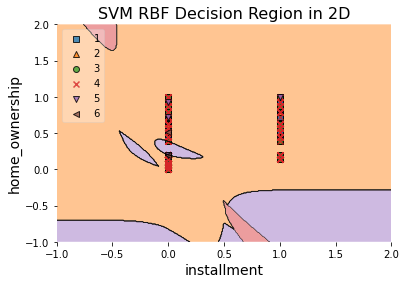

In [42]:
plot_decision_regions(X=X_test[:, [1, 2]], 
                      y=y_test,
                      clf=clf,
                      legend=2)

plt.xlabel("installment", size=14)
plt.ylabel("home_ownership", size=14)
plt.title('SVM RBF Decision Region in 2D', size=16)

In [43]:
mlp = MLPClassifier(hidden_layer_sizes=(100,),max_iter=1000)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [44]:
predictions = mlp.predict(X_test)

In [45]:
confusion_matrix(y_test,predictions)

array([[6107,    0,    0,    0,    0,    0],
       [ 111,    0,    0,    0,    0,    0],
       [  28,    0,    0,    0,    0,    0],
       [ 361,    0,    0,    0,    0,    0],
       [   4,    0,    0,    0,    0,    0],
       [   2,    0,    0,    0,    0,    0]])

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96      6107
           2       0.00      0.00      0.00       111
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00       361
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         2

    accuracy                           0.92      6613
   macro avg       0.15      0.17      0.16      6613
weighted avg       0.85      0.92      0.89      6613



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
accuracy_score(y_test, predictions)

0.9234840465749282